In [1]:
import tensorflow as tf
from tensorflow.keras  import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [2]:
DATADIR = "Insert the directory path here to your parent folder of the indivisual folders" 
CATEGORIES = ["ampulla_of_vater", "angiectasia", "blood_fresh", "blood_hematin", "erosion", "erythema", "foreign_body", "ileocecal_valve", "lymphangiectasia", "normal_clean_mucosa", "polyp", "pylorus", "reduced_mucosal_view", "ulcer"]

In [15]:
training_data = []
IMG_SIZE = 128
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                print("Exception Occured:", e)
                pass
            
create_training_data()

In [16]:
# X_train, X_test, y_train, y_test = train_test_split()
import random

random.shuffle(training_data)
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
print(type(X), type(y))
print(X.shape, y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(33499, 128, 128, 1) (33499,)


In [14]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(CATEGORIES[y[index]])    

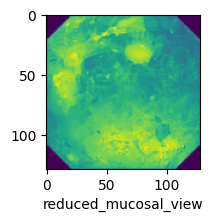

In [6]:
plot_sample(X, y, 321)

In [7]:
cnn = models.Sequential([
        layers.Conv2D(filters = 128, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 1)),
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(filters = 256, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 1)),
        layers.MaxPooling2D((2,2)),
    
        layers.Flatten(),
        layers.Dense(256, activation = 'relu'),
        layers.Dense(14, activation = 'softmax'),
    ])

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint
cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [9]:
from keras.models import load_model
cnn = load_model("network_e10.h5")

In [13]:
cnn.fit(X, y, epochs=2)

Epoch 1/2
1047/1047 [==============================] - 4100s 4s/step - loss: 1.3208 - accuracy: 0.6181
Epoch 2/2
1047/1047 [==============================] - 4233s 4s/step - loss: 1.2374 - accuracy: 0.6369


In [14]:
cnn.fit(X, y, epochs=2)

Epoch 1/2
1047/1047 [==============================] - 4350s 4s/step - loss: 1.1428 - accuracy: 0.6627
Epoch 2/2
1047/1047 [==============================] - 3381s 3s/step - loss: 1.0541 - accuracy: 0.6848


In [15]:
cnn.save("network_e4.h5")
cnn.fit(X, y, epochs = 2)
cnn.save("network_e6.h5")
cnn.fit(X, y, epochs = 2)
cnn.save("network_e8.h5")
cnn.fit(X, y, epochs = 2)
cnn.save("network_e10.h5")

Epoch 1/2
1047/1047 [==============================] - 3875s 4s/step - loss: 1.0026 - accuracy: 0.7019
Epoch 2/2
1047/1047 [==============================] - 3839s 4s/step - loss: 0.9256 - accuracy: 0.7257
Epoch 1/2
1047/1047 [==============================] - 3674s 4s/step - loss: 0.8342 - accuracy: 0.7542
Epoch 2/2
1047/1047 [==============================] - 3293s 3s/step - loss: 0.7787 - accuracy: 0.7702
Epoch 1/2
1047/1047 [==============================] - 3196s 3s/step - loss: 0.6798 - accuracy: 0.7993
Epoch 2/2
1047/1047 [==============================] - 3314s 3s/step - loss: 0.6510 - accuracy: 0.8095


In [10]:
cnn.fit(X, y, epochs = 2)
cnn.save("network_e12.h5")
cnn.fit(X, y, epochs = 3)
cnn.save("network_e15.h5")
# cnn.evaluate(X_test, y_test)

Epoch 1/2
1047/1047 [==============================] - 3890s 4s/step - loss: 0.5970 - accuracy: 0.8246
Epoch 2/2
1047/1047 [==============================] - 3863s 4s/step - loss: 0.6003 - accuracy: 0.8276
Epoch 1/3
1047/1047 [==============================] - 3846s 4s/step - loss: 0.4846 - accuracy: 0.8592
Epoch 2/3
1047/1047 [==============================] - 3878s 4s/step - loss: 0.4547 - accuracy: 0.8703
Epoch 3/3
1047/1047 [==============================] - 3844s 4s/step - loss: 0.4084 - accuracy: 0.8810


In [ ]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 1)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

In [3]:
from keras.models import model_from_json
json_file = open("network.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [4]:
loaded_model.load_weights("network_e25_final.h5")
# loss, accuracy = loaded_model.evaluate(test_data, test_targets)

In [5]:

TESTDATADIR = "D:/Desktop/Improv/Formal Coding/Jupyter Notebooks/TT Lab/Project/Kwasir_capsule/unlabelled_images"
test_data = []
IMG_SIZE = 128
def create_test_data():
    for category in CATEGORIES:
        path = os.path.join(TESTDATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                test_data.append([new_array, class_num])
            except Exception as e:
                print("Exception Occured:", e)
                pass
    print(len(test_data))
            
create_test_data()

65


In [6]:
import random

random.shuffle(test_data)
X_test = []
y_test = []
for features_1, label_1 in test_data:
    X_test.append(features_1)
    y_test.append(label_1)
    
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)
print(type(X_test), type(y_test))
print(X_test.shape, y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(65, 128, 128, 1) (65,)


In [7]:
y_pred = loaded_model.predict(X_test)

3/3 [==============================] - 1s 280ms/step


In [8]:
print(np.argmax(y_pred[5]))
def compute_accuracy(Y_true, Y_pred):  
    correctly_predicted = np.sum(np.allclose(Y_true, Y_pred))  
    accuracy_score = correctly_predicted / len(Y_true)  
    return accuracy_score 

y_classes = [np.argmax(element) for element in y_pred]

y_pred_arr = np.array(y_classes)
print(type(y_pred_arr), type(y_test))

score = compute_accuracy(y_test, y_pred_arr)
print(score)

11
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
0.0


In [9]:
print(y_classes)
print(y_test)

[5, 2, 12, 2, 2, 11, 7, 10, 9, 8, 12, 6, 3, 9, 11, 7, 6, 6, 6, 1, 9, 7, 9, 8, 10, 8, 0, 12, 10, 6, 9, 13, 9, 12, 2, 3, 9, 1, 12, 8, 12, 3, 5, 4, 12, 9, 9, 9, 12, 3, 8, 0, 13, 2, 12, 9, 5, 1, 10, 7, 9, 9, 1, 1, 10]
[ 5  2 13  2  2 11  7 10  9  8 11  6  3  4 11  7  6  6  6  1  4  7 11  8
 10  8  0 12 10  6  4 13  9 12  2  3  9  1 12  8 12  3  5  4  7  4 13 11
 12  3  8  0 13  2  5  9  5  1 10  7  5  9  1  1 10]


In [10]:
corr_count = 0
for i in y_test:
    if y_classes[i] == y_test[i]:
        corr_count += 1
    else:
        print(y_classes[i], y_test[i])
score = corr_count / len(y_test)
print("Accuracy:",score)

12 13
9 4
12 13
12 13
12 11
12 11
12 11
9 4
12 13
9 4
9 4
12 13
12 11
12 11
Accuracy: 0.7846153846153846


In [11]:
# y_pred= model.predict(x_test)
# y_pred= np.argmax(y_pred, axis=1)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
classification = classification_report(y_test, y_classes)
print(classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4
           4       1.00      0.20      0.33         5
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         5
           7       1.00      0.80      0.89         5
           8       1.00      1.00      1.00         5
           9       0.38      1.00      0.56         5
          10       1.00      1.00      1.00         5
          11       1.00      0.40      0.57         5
          12       0.56      1.00      0.71         5
          13       1.00      0.50      0.67         4

    accuracy                           0.82        65
   macro avg       0.92      0.82      0.82        65
weighted avg       0.92      0.82      0.81        65



In [17]:
from sklearn.model_selection import train_test_split
X_full_train, X_full_test, Y_full_train, Y_full_test = train_test_split(X, y, test_size = 0.33)



In [18]:
y_pred = loaded_model.predict(X_full_test)

346/346 [==============================] - 378s 1s/step


In [19]:
y_pred_classes = [np.argmax(element) for element in y_pred]
classification = classification_report(Y_full_test, y_pred_classes)
print(classification)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.93      0.79      0.85       276
           2       0.94      0.98      0.96       143
           3       1.00      1.00      1.00         6
           4       0.91      0.81      0.86       159
           5       0.90      0.68      0.77        53
           6       0.95      0.91      0.93       229
           7       0.94      0.93      0.94      1435
           8       0.97      0.91      0.94       197
           9       0.97      0.95      0.96      6772
          10       1.00      0.93      0.97        15
          11       0.87      0.83      0.85       493
          12       0.76      0.95      0.85       975
          13       0.97      0.94      0.96       300

    accuracy                           0.93     11055
   macro avg       0.91      0.90      0.90     11055
weighted avg       0.94      0.93      0.93     11055



# TODO
Gradcam
Feature map extraction
Check if other techniques are available.
Capsule endoscopy research
Operation of capsule endoscopy -> processing is in-situ or ex-situ
Challenges with capsule endoscopy -> literature review
Classification problems in capsule endoscopy
Segmentation -> 
